## Simulación trayectorias estocásticas

La dinámica tipo Langevin es

$\dot{x} = v$

$\dot{v} = \mu_0(x) - \Gamma(x)\cdot v + \sqrt{2/m\beta} \:\Gamma^{1/2}(x)\cdot \eta$

donde $x=(x_1,x_2)$ y $v=(v_1, v_2)$. Consideramos $\mu_0(x) = (-\nabla\Phi_0(x) + f(x))/m$ con

$\Phi_0(x)/m = a x_1^4 - b x_1^2 + c x_2^2$ y

$f(x)/m = -\omega x_2 \hat x_1 + \omega x_1 \hat x_2$

Además, por simplicidad tomamos

$\Gamma(x) = \gamma \mathbb{1}_{2\times 2}$

In [1]:
%matplotlib ipympl

from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
from numba import njit

In [124]:
# Parámetros

a = 1.0
b = 6.0
c = 1.0
omega = 1.0

# mbeta = 1

gamma = 3

def mu(x):

    f = np.zeros_like(x)    

    f[0] = -1*(4*a*(x[0]**3)-2*b*x[0]) - omega*x[1]
    f[1] = -2*c*x[1] + omega*x[0]

    return f

def gen_traj(x_0, v_0, tf, dt, mbeta = 1):

    T = np.arange(0,tf,dt)

    X = np.zeros((len(x_0), len(T)))
    V = np.zeros((len(v_0), len(T))) 
    X[:,0] = x_0
    V[:,0] = v_0
    
    Xd = np.zeros((len(x_0), len(T))) # determinitic
    Vd = np.zeros((len(v_0), len(T))) 
    Xd[:,0] = x_0
    Vd[:,0] = v_0    


    aux = np.sqrt(2*gamma*dt/mbeta)

    for k in tqdm(range(1,len(T))):

        X[:,k] = X[:,k-1] + V[:,k-1]*dt
        eta = np.random.normal(size=(1,2))        
        V[:,k] = V[:,k-1] + (mu(X[:,k-1]) - gamma*V[:,k-1])*dt + aux*eta
    
        Xd[:,k] = Xd[:,k-1] + Vd[:,k-1]*dt 
        Vd[:,k] = Vd[:,k-1] + (mu(Xd[:,k-1]) - gamma*Vd[:,k-1])*dt 


    return T, X, V, Xd, Vd

In [180]:
x_0 = np.array([0,0]).T
v_0 = np.array([1,1]).T
Tf = 20
dt = .001
%time T, X, V, Xd, Vd = gen_traj(x_0, v_0, Tf, dt,100)

100%|██████████| 19999/19999 [00:00<00:00, 26261.53it/s]

CPU times: total: 922 ms
Wall time: 994 ms


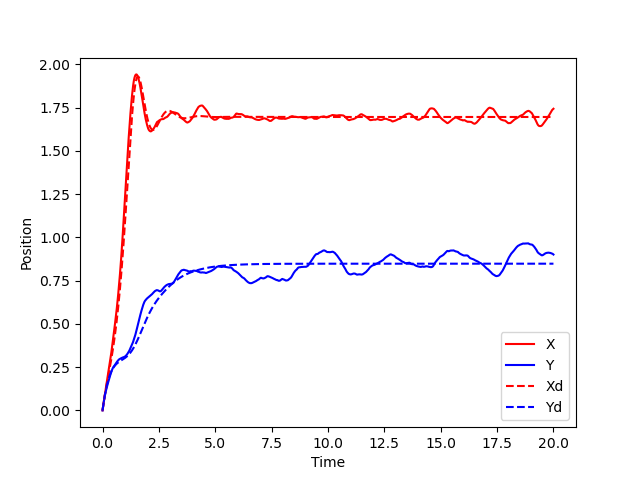

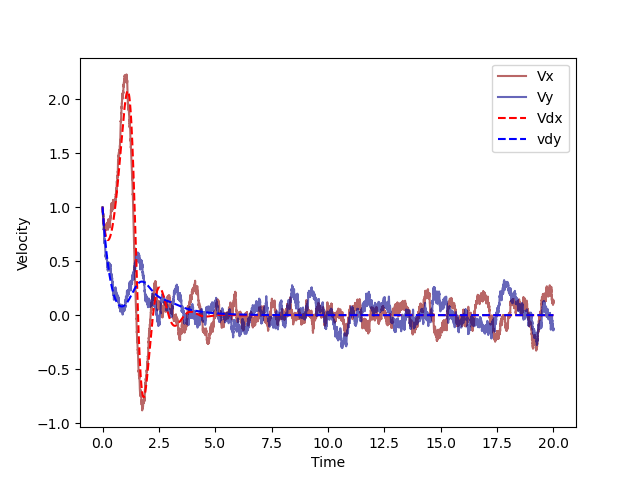

In [181]:
plt.figure()
plt.plot(T, X[0,:], label = "X", c = "red")
plt.plot(T, X[1,:], label = "Y", c = "blue")
plt.plot(T, Xd[0,:], label = "Xd", c = "red", ls = "--")
plt.plot(T, Xd[1,:], label = "Yd", c = "blue", ls = "--")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()

plt.figure()
plt.plot(T, V[0,:], label = "Vx", c = "darkred", alpha = 0.6)
plt.plot(T, V[1,:], label = "Vy", c = "darkblue", alpha = 0.6)
plt.plot(T, Vd[0,:], label = "Vdx", c = "red", ls = "--")
plt.plot(T, Vd[1,:], label = "vdy", c = "blue", ls = "--")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()

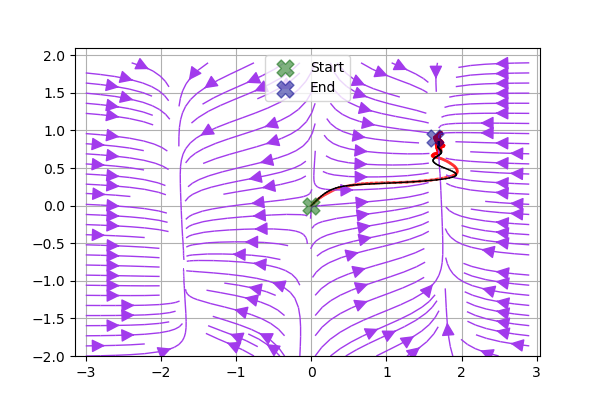

In [192]:
plt.close("all")

# Particula con traza
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.axis('equal')
N = 500
step = int(Tf/(dt*(N+1)))
ax.scatter(X[0,:][0], X[1,:][0], color = "darkgreen", label = "Start", marker = "X",s = 150, zorder = 4, alpha = .5)
ax.scatter(X[0,:][int(N*step)], X[1,:][int(N*step)], color = "darkblue", label = "End", marker = "X",s = 150, zorder = 4, alpha=.5)

for i in range(N):           
   #ax.plot(X[0,:][i:i+2], X[1,:][i:i+2], color="k", alpha= (i/N),linewidth=2) # la traza   
   ax.plot([X[0,:][i*step],X[0,:][(i+1)*step]], [X[1,:][i*step],X[1,:][(i+1)*step]], color="r", alpha= (i/(2*N)+.5),linewidth=2) # la traza 
   ax.plot([Xd[0,:][i*step],Xd[0,:][(i+1)*step]], [Xd[1,:][i*step],Xd[1,:][(i+1)*step]], color="k",linewidth=1, zorder = 3)
# Campo de fuerza
# 1D arrays 
x = np.arange(-3,3,0.1) 
y = np.arange(-2,2,0.1) 
# Meshgrid 
x1,y1 = np.meshgrid(x,y) 
# Assign vector directions 
u = mu([x1,y1])[0]
v = mu([x1, y1])[1]
plt.streamplot(x1,y1,u,v, density=1, linewidth=1, color='#A23BEC', arrowsize=2) 
  
# Show plot with grid 
plt.legend()
plt.grid() 
plt.show()

### Comparo para diferentes valores de  $m\beta$


In [75]:
x_0 = np.array([2,1]).T
v_0 = np.array([1,1]).T

%time T, X, V, Xd, Vd = gen_traj(x_0, v_0, 20, .001)
%time T, X2, V2, Xd2, Vd2 = gen_traj(x_0, v_0, 20, .001, 10)
%time T, X3, V3, Xd3, Vd3 = gen_traj(x_0, v_0, 20, .001, 100)



100%|██████████| 19999/19999 [00:00<00:00, 30235.31it/s]


CPU times: total: 625 ms
Wall time: 665 ms


100%|██████████| 19999/19999 [00:00<00:00, 27452.48it/s]


CPU times: total: 703 ms
Wall time: 738 ms


100%|██████████| 19999/19999 [00:00<00:00, 27710.68it/s]

CPU times: total: 688 ms
Wall time: 742 ms


20000


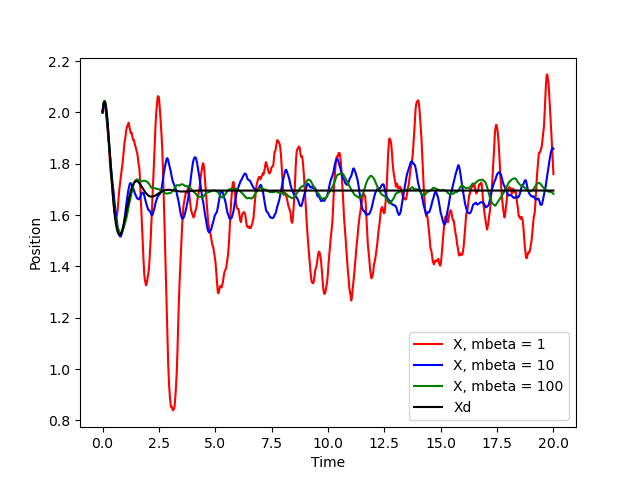

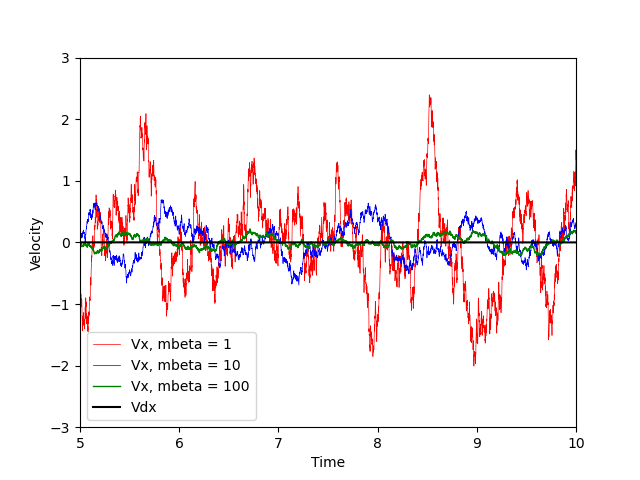

In [76]:
plt.figure()
plt.plot(T, X[0,:], label = "X, mbeta = 1", c = "r")
plt.plot(T, X2[0,:], label = "X, mbeta = 10", c = "b")
plt.plot(T, X3[0,:], label = "X, mbeta = 100", c = "g")
plt.plot(T, Xd[0,:], label = "Xd", c = "k")
#plt.xlim(5,20)
#plt.ylim(-2.5,-1)
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()

plt.figure()
plt.plot(T, V[0,:], label = "Vx, mbeta = 1", c = "r", lw = .5)
plt.plot(T, V2[0,:], label = "Vx, mbeta = 10", c = "b", lw = .5)
plt.plot(T, V3[0,:], label = "Vx, mbeta = 100", c = "g", lw = 1)
plt.plot(T, Vd[0,:], label = "Vdx", c = "k")
plt.xlim(5,10)
plt.ylim(-3,3)
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()
print(len(T))

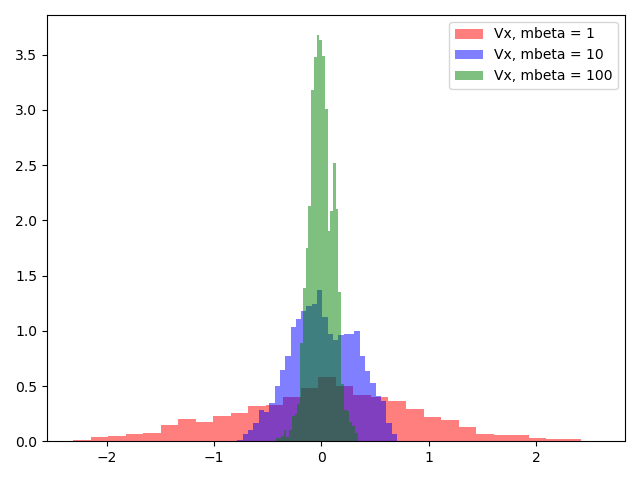

In [77]:
step_0 = 5000

fig, axs = plt.subplots(1, 1, tight_layout = True)
N, bins, patches = axs.hist(V[0,step_0:], bins = 30, density=True, alpha = 0.5, label = "Vx, mbeta = 1", color = "r")
N, bins, patches = axs.hist(V2[0,step_0:], bins = 30, density=True, alpha = 0.5, label = "Vx, mbeta = 10", color = "b")
N, bins, patches = axs.hist(V3[0,step_0:], bins = 30, density=True, alpha = 0.5, label = "Vx, mbeta = 100", color = "g")
plt.legend()
plt.show()


###  Histogramas 2D 

In [84]:
x_0 = np.array([0,0]).T
v_0 = np.array([0,0]).T


%time T4, X4, V4, Xd4, Vd4 = gen_traj(x_0, v_0, 10000, .001, 100)

100%|██████████| 9999999/9999999 [05:32<00:00, 30120.31it/s]

CPU times: total: 5min 15s
Wall time: 5min 32s


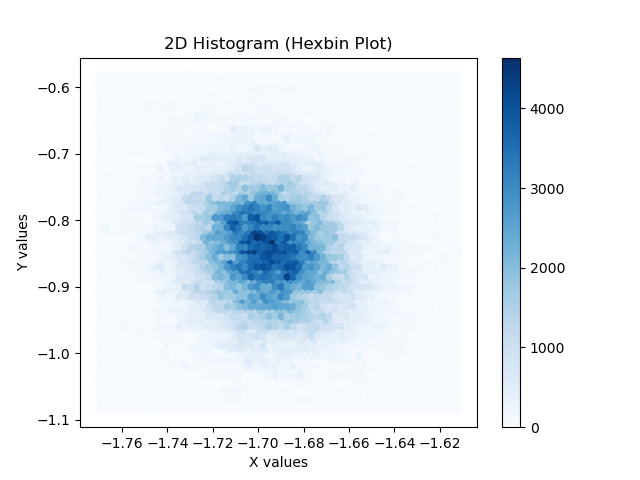

In [81]:
step_0 = 10000
plt.close("all")
# Creating a 2D histogram (hexbin plot)
plt.hexbin(X4[0,step_0:], X4[1,step_0:], gridsize=60, cmap='Blues')
 
# Adding labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('2D Histogram (Hexbin Plot)')
 
# Adding colorbar
plt.colorbar()
 
# Display the plot
plt.show()

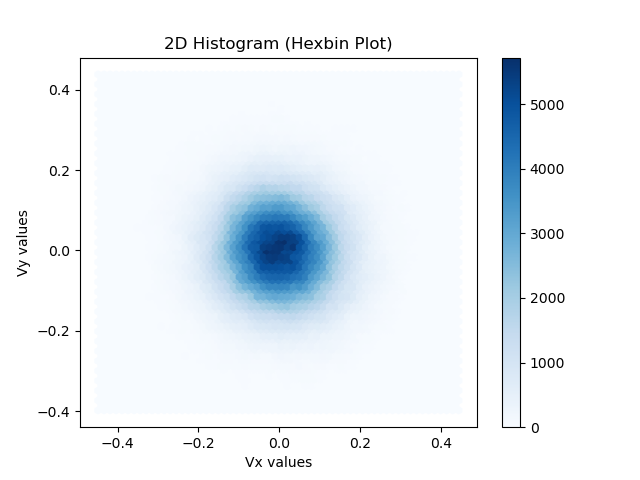

In [82]:
plt.close("all")
# Creating a 2D histogram (hexbin plot)
plt.hexbin(V4[0,step_0:], V4[1,step_0:], gridsize=60, cmap='Blues')
 
# Adding labels and title
plt.xlabel('Vx values')
plt.ylabel('Vy values')
plt.title('2D Histogram (Hexbin Plot)')
 
# Adding colorbar
plt.colorbar()
 
# Display the plot
plt.show()

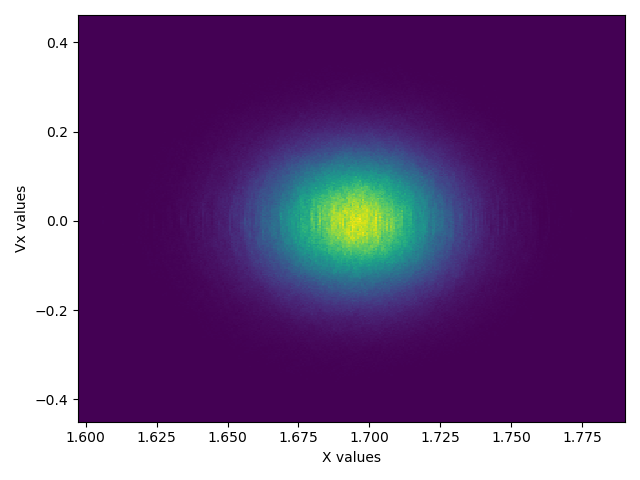

In [85]:
plt.close("all")
# Creating a 2D histogram (hexbin plot)
#plt.hist(X4[0,step_0:], V4[0,step_0:], bins=60, cmap='Blues')
fig, axs = plt.subplots(1, 1, tight_layout = True)
axs.hist2d(X4[0,step_0:], V4[0,step_0:], bins = 300, density=True, label = "Vx, mbeta = 1")
# Adding labels and title
plt.xlabel('X values')
plt.ylabel('Vx values')
# Adding colorbar
#plt.colorbar()
 
# Display the plot
plt.show()

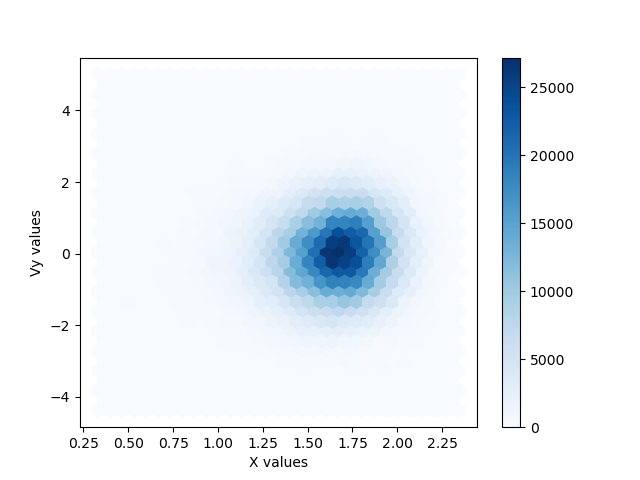

In [22]:
plt.close("all")
# Creating a 2D histogram (hexbin plot)
plt.hexbin(X4[0,step_0:], V4[1,step_0:], gridsize=30, cmap='Blues')
 
# Adding labels and title
plt.xlabel('X values')
plt.ylabel('Vy values')
 
# Adding colorbar
plt.colorbar()
 
# Display the plot
plt.show()

100%|██████████| 999999/999999 [00:33<00:00, 29645.28it/s]


CPU times: total: 33 s
Wall time: 33.7 s


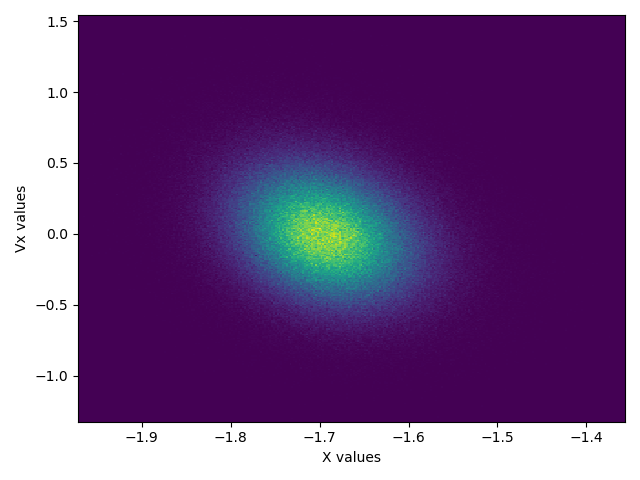

In [195]:
gamma = 3

x_0 = np.array([0,0]).T
v_0 = np.array([0,0]).T

%time T5, X5, V5, Xd5, Vd5 = gen_traj(x_0, v_0, 100000, .1, 50)
step_0 = 10000

plt.close("all")
# Creating a 2D histogram (hexbin plot)
#plt.hist(X4[0,step_0:], V4[0,step_0:], bins=60, cmap='Blues')
fig, axs = plt.subplots(1, 1, tight_layout = True)
axs.hist2d(X5[0,step_0:], V5[0,step_0:], bins = 300, density=True, label = "Vx, mbeta = 1")
# Adding labels and title
plt.xlabel('X values')
plt.ylabel('Vx values')
# Adding colorbar
#plt.colorbar()
 
# Display the plot
plt.show()


gamma = 3

### Distribución Estacionaria 2D


In [196]:
gamma = 3

def gen_traj_ss(num_traj, step_0, x_0, v_0, tf, dt, mbeta = 1):
    X, V = [[],[]],[[],[]]
    for i in range(num_traj):
        T6, X6, V6, Xd6, Vd6 = gen_traj(x_0, v_0, tf, dt, mbeta)
        X[0].extend(X6[0,step_0:])
        X[1].extend(X6[1,step_0:])
        V[0].extend(V6[0,step_0:])
        V[1].extend(V6[1,step_0:])
    return X, V


num_traj = 10
step_0 = 10000
x_0 = np.array([0,0]).T
v_0 = np.array([0,0]).T
X, V = gen_traj_ss(num_traj, step_0, x_0, v_0, 100, .001, 50)

  0%|          | 0/99999 [00:00<?, ?it/s]

100%|██████████| 99999/99999 [00:03<00:00, 28643.38it/s]


In [172]:
print(len(X))
print(len(X[1]))
print(np.shape(X))

2
0
(2, 0)


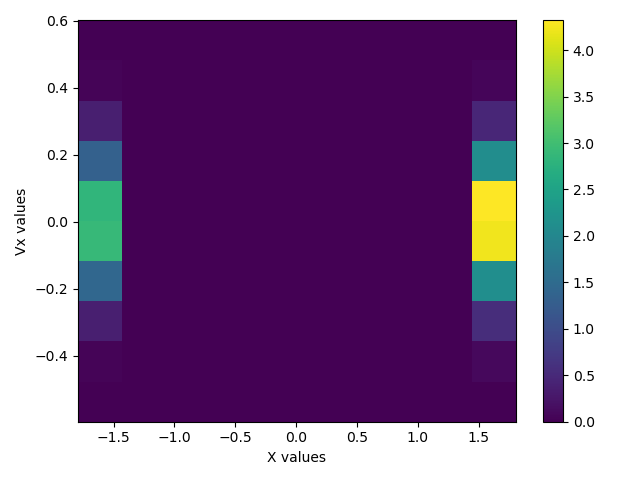

In [210]:
plt.close("all")
# Creating a 2D histogram (hexbin plot)
#plt.hist(X4[0,step_0:], V4[0,step_0:], bins=60, cmap='Blues')
fig, axs = plt.subplots(1, 1, tight_layout = True)
im = axs.hist2d(X[0], V[0], bins = 10, density=True)
# Adding labels and title
plt.xlabel('X values')
plt.ylabel('Vx values')
# Adding colorbar
cbar = fig.colorbar(im[3], ax=axs)
 
# Display the plot
plt.show()

4


In [262]:
print(im[1])
#print(np.searchsorted(im[1], -1))
#print(im[1][3])
num = 2
#idx = (np.abs(im[1] - num)).argmin()
idx = np.searchsorted(im[1], -1.5) -1
print(idx)
print("---")
#print(im[0][9,0])

[-1.7915019  -1.43215937 -1.07281684 -0.71347431 -0.35413178  0.00521075
  0.36455328  0.72389581  1.08323834  1.44258087  1.8019234 ]
0
---


In [263]:
def prob_ss(histogram, x):
    hist, xedges, yedges, _ = histogram
    # Encontrar los índices correspondientes a los valores de x_val y y_val
    #x_index = (np.abs(xedges - x[0])).argmin() -1
    #y_index = (np.abs(yedges - x[1])).argmin() -1
    x_index = np.searchsorted(xedges, x[0]) -1
    y_index = np.searchsorted(yedges, x[1]) -1
    return(hist[x_index,y_index]),x_index,y_index
    
prob_ss(im,[1.503,0.187])



(2.104073340313116, 9, 6)

In [232]:
print(x_index)

NameError: name 'x_index' is not defined